In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen


In [2]:
web = urlopen('https://play.google.com/store/apps')
source = bs(web, 'html.parser')
table0 = source.find(class_='LNKfBf').find_all('li')

In [3]:
def find_categories(table):
    
    categories = []
    for string in range(len(table)-1):
        for word in table0[string+1].strings:
            categories.append(word)
            
    return categories

In [4]:
def find_tag_from_category(table,category):
    
    for string in range(len(table0)-1):
        for word in table0[string+1].strings:
            if word == category:
                tag = table0[string+1]
                
    return tag

In [5]:
categories = find_categories(table0)
print(categories)
category = input('Select a category : ')
newUrl = 'https://play.google.com' + find_tag_from_category(table0, category).a.get('href')

['Art & Design', 'Augmented reality', 'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business', 'Comics', 'Communication', 'Dating', 'Daydream', 'Education', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Shopping', 'Social', 'Sports', 'Tools', 'Travel & Local', 'Video Players & Editors', 'Wear OS by Google', 'Weather', 'Games', 'Action', 'Adventure', 'Arcade', 'Board', 'Card', 'Casino', 'Casual', 'Educational', 'Music', 'Puzzle', 'Racing', 'Role Playing', 'Simulation', 'Sports', 'Strategy', 'Trivia', 'Word', 'Games', 'Action', 'Adventure', 'Arcade', 'Board', 'Card', 'Casino', 'Casual', 'Educational', 'Music', 'Puzzle', 'Racing', 'Role Playing', 'Simulation', 'Sports', 'Strategy', 'Trivia', 'Word', 'Kids', 'Ages up to 5', 'Ages 6-8', 'Ages 9-12', 'Action & Adventure', 'Brain G

In [6]:
newUrl

'https://play.google.com/store/apps/category/ART_AND_DESIGN'

In [7]:
def find_apps(newUrl):
    app_Urls = []
    web = urlopen(newUrl)
    source = bs(web, 'html.parser')
    table = source.find_all("div", {"class": "WHE7ib mpg5gc"})
    for i in range(len(table)):
        app_Urls.append('https://play.google.com' + table[i].a.get('href'))
        
    return app_Urls



In [8]:
def get_app_content(app_Url):
    
    web = urlopen(app_Url)
    source = bs(web, 'html.parser')
    table = source.find(class_='WpDbMd').find_all('meta')
    
    for i in range(len(table)):
        if(table[i].get('itemprop') == 'price'):
            index = i   
            
    content = table[index+1].get('content')
    
    return content

In [9]:
app_Urls = find_apps(newUrl)
len(app_Urls)

21

In [10]:
app_contents = []
for i in range(len(app_Urls)):
    app_contents.append(get_app_content(app_Urls[i]))

In [11]:
import nltk 
from nltk.stem import PorterStemmer 
from nltk.tokenize import RegexpTokenizer
stopwords = set(nltk.corpus.stopwords.words('english'))

In [12]:
contentsArr = []
ps = PorterStemmer()    
tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(app_contents)):
    doc = [ps.stem(word) for word in list(tokenizer.tokenize(app_contents[i]))] 
    contentsArr.append(doc)
    

In [13]:
def remove_stopwords(contentsArr):
    contents = []
    for i in range(len(contentsArr)):
        filtered_sentence = [w for w in contentsArr[i] if not w in stopwords]
        contents.append(filtered_sentence)
    return contents

In [16]:
##print(contentsArr[0])  
contents = remove_stopwords(contentsArr)
##print(contentsArr[0])  

In [18]:
corpus = []
for i in range(len(contents)):
    for j in range(len(contents[i])):
        corpus.append(contents[i][j])
len(corpus)

5484

In [27]:
corpus[:15]

['ibi',
 'paint',
 'X',
 'popular',
 'versatil',
 'draw',
 'app',
 'download',
 '100',
 'million',
 'time',
 'total',
 'seri',
 '2500',
 'materi']

Text(0.5, 1.0, 'Frequent Words')

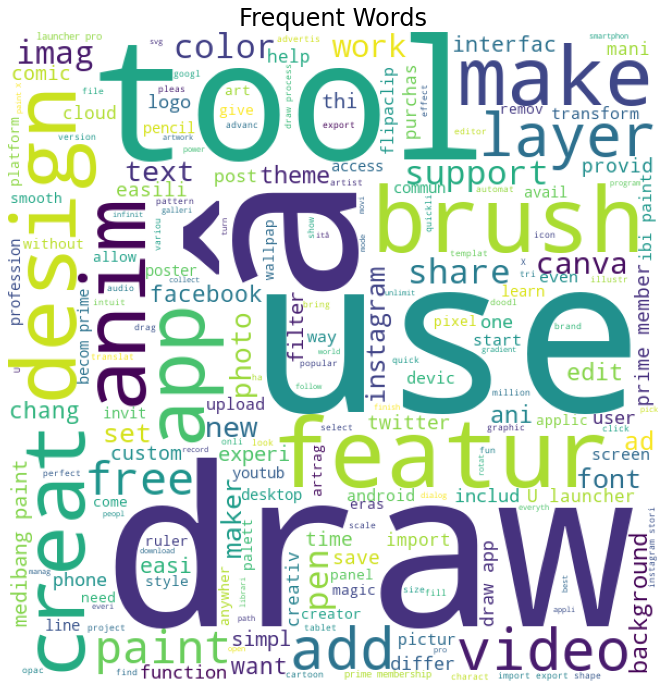

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig , ax1 = plt.subplots(1,figsize=(12,12))
wordcloud=WordCloud(background_color='white',width=600,height=600).generate(" ".join(corpus))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=24)